# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
# Import the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./human_body_temperature.csv')

In [6]:
# Quick summary of our table
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
# Make sure that there are no null values
df.isnull().any()

temperature    False
gender         False
heart_rate     False
dtype: bool

In [7]:
# Quick statistical summary of the numerical variables
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Central Limit Theorem (CLT) Assumptions/Requirements

Source: http://archive.cnx.org/contents/ee652647-7d10-4c33-b439-9bdf5aa6ba3f@1/central-limit-theorem-assumptions-and-conditions

To use the normal model, we must meet some assumptions and conditions. The Central Limit Theorem assumes the following:

**Randomization Condition:** The data must be sampled randomly. Is one of the good sampling methodologies discussed in the chapter “Sampling and Data” being used?

**Independence Assumption:** The sample values must be independent of each other. This means that the occurrence of one event has no influence on the next event. Usually, if we know that people or items were selected randomly we can assume that the independence assumption is met.

**10% Condition:** When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population.

**Sample Size Assumption:** The sample size must be sufficiently large. Although the Central Limit Theorem tells us that we can use a Normal model to think about the behavior of sample means when the sample size is large enough, it does not tell us how large that should be. If the population is very skewed, you will need a pretty large sample size to use the CLT, however if the population is unimodal and symmetric, even small samples are acceptable. So think about your sample size in terms of what you know about the population and decide whether the sample is large enough. In general a sample size of 30 is considered sufficient if the sample is unimodal (and meets the 10% condition).

# Testing One Population Mean

# Question 1:
**Is the distribution of body temperatures normal?**

*Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.*

*Answer:* Based on the graph below, it looks normally distributed. 

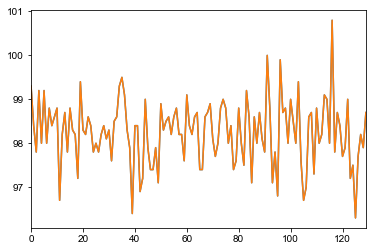

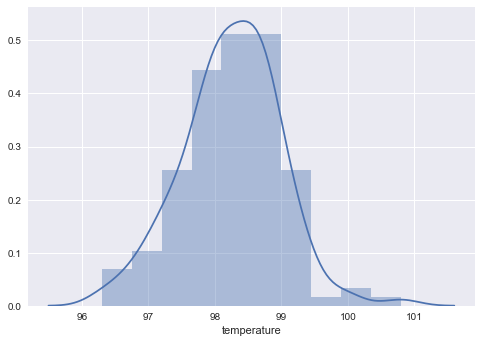

In [13]:
# Plot the temperature feature on the Human_Body_Temperature data set
# Looks like the graph is noramlly distributed
f,ax1 = plt.subplots(1,1)
sns.distplot(df['temperature'],bins=10,norm_hist=False)
plt.show()

# Question 2:
**Is the sample size large? Are the observations independent?** Yes, the sample size is large because n>30. Yes, the observations are independent from each other.

*Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.*


In [16]:
# Is the sample size large?
# There are 130 observations and 3 features. The sample size is large
df.shape

(130, 3)

# Question 3:
**Is the true population mean really 98.6 degrees F?** Since Z-Score < -1.96 is true, we can reject the null hypothesis. We can conclude that there is sufficient evidence to support alternative hypothesis that average body temperature is different from 98.6

**Would you use a one-sample or two-sample test? Why?** I would use a two-sample hypothesis test because we are comparing the values on the null and alternative hypothesis on both ends of the spectrum, whether the popululation mean < 98.6 or mean > 98.6

**In this situation, is it appropriate to use the  tt  or  zz  statistic?** It would be appropriate to use the z statistic because the sample size is greater than 30. 

**Now try using the other test. How is the result be different? Why?**

In [7]:
# Define the population mean
u = 98.6

In [8]:
# Define the sample size of the population
n = len(df.index)
n

130

In [5]:
# Find the mean temperature of the sample population
x = df['temperature'].mean()
x

98.24923076923078

In [6]:
# Find the standard deviation of the sample population
std = df['temperature'].std()
std

0.7331831580389454

## Z-Test:
**Step 1:** The **null hypothesis** is u = 98.6. The **alternative hypothesis** is u != 98.6 (two-tailed test)

**Step 2:** Significance Level - a = 0.05 (since it's a two-tailed test a = 0.05 / 2 = 0.025) => **a = 0.025 | z-score = 1.96**

**Step 3:** Compute Random Chance Probability / Z-Score - z = (x - u) / (std / sqrt(n))


In [16]:
import math
z_score = (x-u) / (std / math.sqrt(n))
z_score

-5.454823292364079

**Step 4:** Level of Significance - Reject null hypothesis if Z-Score < -1.96 or Z-Score > 1.96

**Step 5:** Conclusion - Since Z-Score < -1.96 is true, we can reject the null hypothesis. We can conclude that there is sufficient evidence to support alternative hypothesis that average body temperature is different from 98.6

# Question 4:
**At what temperature should we consider someone's temperature to be "abnormal"?** At 95% Confidence Interval, the abnormal temperature would be less than 98.186 F or greater than 98.314 F.

*Start by computing the margin of error and confidence interval.*

Margin of Error = Sample Error / Sqrt(Size) = .733 / Sqrt(130) = 0.064

Confidence Interval at 95% = (98.25 - 0.064) and (98.25 + 0.064)

# Question 5: 
**Is there a significant difference between males and females in normal temperature?** Because our calculated value falls within the rejection area, we must reject the null hypothesis. The mean body teamperature of males are significantly different than that of females. 

**What test did you use and why?** I used a two sample t-test because we are comparing two sample populations

**Write a story with your conclusion in the context of the original problem.**

In [23]:
# Create the sample population for males
df_male = df[df['gender']=='M'].temperature
df_male.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [24]:
# Create the sample population for females
df_female = df[df['gender']=='F'].temperature
df_female.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [28]:
# Save the mean and standard deviation for both male/female samples
maleMean = df_male.mean()
maleSD = df_male.std()

femaleMean = df_female.mean()
femaleSD = df_female.std()

n = df_male.count()

## Two-Sample t-Test
**Null Hypothesis:** H0: There is no difference between male and female temperature

**Alternative Hypothesis:** HA: There is a difference between male and female temperature

**Test Statistic:** T = maleMean - femaleMean / Sqrt((maleSD/n) + (femaleSD/n)) 

**Significance Level:** a = 0.05 (since it's a two-tailed test a = 0.05 / 2 = 0.025) => **a = 0.025 | z-score = 1.96**

In [29]:
# Calculate the Test Statistic
t_test = (maleMean - femaleMean) / math.sqrt((maleSD/n) + (femaleSD/n))
t_test

-1.9416988505148356